# Week 4 - NumPy and matplotlib

These libraries are fundamental to the scientific Python ecosystem. Let's look at each of them in detail.

## NumPy

There is no substitute for the [absolute basics guide to NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html), but here's an introduction with some of my own perspectives. 

NumPy is the fundamental package for numerical computation in Python. It's core feature is a multidimensional, or *N*-dimensional, array object with fast and efficient methods for performing all manner of operations. Arrays commonly have one or two dimensions, in which case they may be called [vectors](https://en.wikipedia.org/wiki/Vector_space) or [matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)), but they can also have upwards of three dimensions, in which case they may be referred to as [tensors](https://en.wikipedia.org/wiki/Tensor). We will deal primarily with vectors, and perhaps the occasional matrix.



In [1]:
import numpy as np  # Widely adopted convention for importing numpy

print("A 1-dimensional array, also known as a vector.")
print(np.array([1,2,3,4,5,6,7,8,9]))
print("A 2-dimensional array, also known as a matrix.")
print(np.array([[1,2,3],[4,5,6],[7,8,9]]))
print("A 3-dimensional array, also known as a tensor.")
print(np.array([[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]]))

A 1-dimensional array, also known as a vector.
[1 2 3 4 5 6 7 8 9]
A 2-dimensional array, also known as a matrix.
[[1 2 3]
 [4 5 6]
 [7 8 9]]
A 3-dimensional array, also known as a tensor.
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]]


### Python lists vs. NumPy arrays

We know about Python lists. They are dynamic containers for grouping together other objects, possibly of different types. A NumPy array is different in that its size gets fixed at the time of creation and its data are homogeneously typed. Why do we need NumPy arrays when we can make a list of numbers and use the built-in `math` and `statistics` libraries for our numerical computations? The answer is **efficiency and convenience.**

Allow me to demonstrate. The cell below compares Python lists to NumPy arrays on the following measurements:

  1. Time taken to create a sequence of 10000 random floating point numbers between 0-1
  2. Time taken to compute the mean of all values in the sequence
  3. Size of the resulting object in bytes

---

> _**NOTE:**_ Jupyter notebooks have some built-in 'magic' functions, one of which is called `%timeit`. This function repeats a bit of code a specified number of times and reports how long it took to execute, on average. Below, we conduct 7 runs of 10000 loops, and the reported time is the average execution time for a single loop of code. You can [follow this link](https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit) to read more about `%timeit` and other so-called magic functions in Jupyter. 

---


In [5]:
import sys
import random
import statistics


# Number of elements in the array / list
TEST_SIZE = 10000


print("~~~ Python list ~~~")
print("\n")
print("Creation time for Python list:")
%timeit -r 7 -n 10000 python_list = [random.random() for i in range(TEST_SIZE)]
python_list = [random.random() for i in range(TEST_SIZE)]
print("\n")
print("Time to compute mean of Python list:")
%timeit -r 7 -n 10000 statistics.mean(python_list)
print("\n")
print("Size of Python list in bytes:")
print(sys.getsizeof(python_list))
print("\n")
print("~~~ numpy array ~~~")
print("\n")
print("Creation time for numpy array:")
%timeit -r 7 -n 10000 numpy_array = np.random.rand(TEST_SIZE)
numpy_array = np.random.rand(TEST_SIZE)
print("\n")
print("Time to compute mean of numpy array:")
%timeit -r 7 -n 10000 numpy_array.mean()
print("\n")
print("Size of numpy array in bytes:")
print(sys.getsizeof(numpy_array))

~~~ Python list ~~~


Creation time for Python list:
775 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Time to compute mean of Python list:
5.69 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Size of Python list in bytes:
85176


~~~ numpy array ~~~


Creation time for numpy array:
71.6 µs ± 365 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Time to compute mean of numpy array:
5.74 µs ± 206 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Size of numpy array in bytes:
80104


These results are striking. It takes more than 10 times as long to create the same data in a list compared to a NumPy array, and it takes nearly ***1000 times longer to calculate the mean*** (noting the difference between milliseconds [$ms$] and microseconds [$\mu s$]). On top of that, the NumPy array uses ~6% less computer memory than the Python list. 

Hopefully you are convinced&mdash;NumPy arrays are faster and more efficient. Don't confuse the two, and always prefer arrays for numerical computing.


### Making arrays

As shown above, arrays can be created from a Python sequence using `np.array`, but this is not very efficient as it comes with the additional overhead of Python object creation. 

A better approach is to use NumPy's dedicated functions for array creation, such as `np.zeros`, `np.ones`, `np.arange`, `np.linspace`, `np.random.random`, `np.random.randint`, `np.eye`, and `np.diag`.

In [9]:
import numpy as np
print('np.zeros:         ', np.zeros(5))
print('np.ones:          ', np.ones(5))
print('np.arange:        ', np.arange(5))
print('np.linspace:      ', np.linspace(0, 4, 5))
print('np.random.random: ', np.random.random(5))
print('np.random.randint:', np.random.randint(1, 10, 5))
print('np.eye (identity matrix):')
print(np.eye(4))
print('np.diag (diagonal matrix):')
print(np.diag([1, 2, 3, 4]))

np.zeros:          [0. 0. 0. 0. 0.]
np.ones:           [1. 1. 1. 1. 1.]
np.arange:         [0 1 2 3 4]
np.linspace:       [0. 1. 2. 3. 4.]
np.random.random:  [0.58582264 0.15637124 0.08950865 0.42260642 0.92534194]
np.random.randint: [9 3 2 8 5]
np.eye (identity matrix):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
np.diag (diagonal matrix):
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Don't forget you can use the `help` function or `?` introspection to get more info on any of the above.

### Array attributes

NumPy arrays can be described by their shape, number of dimensions, size (i.e., number of elements they contain), data type, and memory usage, all of which are stored as attributes of the `ndarray` object. 

Below we create a 3x4x5 array of random numbers between 0-9 and report the aforementioned attributes. 

In [212]:
a = np.random.randint(10, size=(3, 4, 5))
print("The array a: ")
print(a)
print('Shape:                ', a.shape)
print('Number of dimensions: ', a.ndim)
print('Number of elements:   ', a.size)
print('Data type:            ', a.dtype)
print('Number of bytes:      ', a.nbytes)

The array a: 
[[[3 2 1 7 2]
  [4 9 2 6 9]
  [8 9 8 3 3]
  [5 1 9 3 5]]

 [[6 5 8 7 6]
  [6 0 4 9 3]
  [0 5 0 5 1]
  [9 3 0 3 1]]

 [[3 0 9 4 5]
  [7 6 5 9 7]
  [8 1 6 4 3]
  [8 8 3 7 9]]]
Shape:                 (3, 4, 5)
Number of dimensions:  3
Number of elements:    60
Data type:             int64
Number of bytes:       480


### Loading text files

Rather than create arrays from NumPy functions, it is more likely that we will want to create them from data saved in a file somewhere. One of the simplest data formats is a plain text file with spaces between each value, an example of which can be found in the `data` folder of the course materials. Let's inspect the contents using the `cat` shell utility. 

---

> _**NOTE:**_ `cat` is a Unix shell utility that con*cat*enates specified files and writes them to the standard output. If you are using Windows, you may need to use the `type` command instead. 

---

In [10]:
#!type ../data/space_separated_values.txt
!cat ../data/space_separated_values.txt

24 23 15 77 46 366 26 12 4 
98 79 4 6 366 3 4 3 55 
35 7 92 30 24 70 8 3 2 

Getting these data into an array is easily achieved with `np.loadtxt(...)`, which assumes whitespace as the default delimiter for values. We just need to pass in the name of the file.

In [11]:
data = np.loadtxt('../data/space_separated_values.txt')
data

array([[ 24.,  23.,  15.,  77.,  46., 366.,  26.,  12.,   4.],
       [ 98.,  79.,   4.,   6., 366.,   3.,   4.,   3.,  55.],
       [ 35.,   7.,  92.,  30.,  24.,  70.,   8.,   3.,   2.]])

The CSV file format is perhaps the most common for storing and sharing data, but CSV files are just plain text files with comma separated values.


In [12]:
#!type ../data/comma_separated_values.txt
!cat ../data/comma_separated_values.csv

3,4,52,6,78,9,44,2,1,4,41
9,79,6,37,85,1,2,4,66,34,24
1,114,43,46,7,88,797,9,79,24,37

Again, we can use `np.loadtxt(...)` to load these data as an array, but this time we must tell the function that commas are used to delimit the separate values.

In [13]:
data = np.loadtxt('../data/comma_separated_values.csv', delimiter=',')
data

array([[  3.,   4.,  52.,   6.,  78.,   9.,  44.,   2.,   1.,   4.,  41.],
       [  9.,  79.,   6.,  37.,  85.,   1.,   2.,   4.,  66.,  34.,  24.],
       [  1., 114.,  43.,  46.,   7.,  88., 797.,   9.,  79.,  24.,  37.]])

### Descriptive statistics

The [mean](https://en.wikipedia.org/wiki/Mean), or average, value of a numerical dataset is a useful measure of central tendency that most people know about. Depending on your background, you may not have heard of [variance](https://en.wikipedia.org/wiki/Variance) or [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation), statistics which measure the dispersion of data about the mean. 

NumPy arrays have methods to calculate the mean, variance, standard deviation, and many other useful descriptives. 

---

> _**NOTE: Mean, variance and standard deviation**_. If you measured the length of every match in a standard box of matches with sub-millimeter precision, the variance and standard deviation would be low, because the matches are all very similar in length. In this case, the mean length of a match would be very close to the actual length of any match taken out of the box. But if you measured the height of every person on the number 10 bus, the variance and standard deviation would be greater, because humans vary naturally in height. Here's a fun tutorial on [variance and standard deviation](https://www.mathsisfun.com/data/standard-deviation.html).

---


In [222]:
# Make array of 10 random integers between 0-100
a = np.random.randint(0, 100, 10)
print('The array a:                     ', a)
print('Minimum value of a:              ', a.min())
print('Maximum value of a:              ', a.max())
print('Index of the minimum value in a: ', a.argmin())
print('Index of the maximum value in a: ', a.argmax())
print('Mean of a:                       ', a.mean())
print('Variance of a:                   ', a.var())
print('Standard devition of a:          ', a.std())
print('Sum of all elements in a:        ', a.sum())


The array a:                      [65 85 10 51 66 50 78 12 30  3]
Minimum value of a:               3
Maximum value of a:               85
Index of the minimum value in a:  9
Index of the maximum value in a:  1
Mean of a:                        45.0
Variance of a:                    789.4
Standard devition of a:           28.09626309671804
Sum of all elements in a:         450


### Array indexing

As with lists, NumPy arrays can be indexed using the `[start:stop:step]` syntax, but remember that indices start at zero and the final index is exclusive.


In [6]:
# Make array of numbers 1-10
a = np.linspace(1, 10, 10)
print('The array a:                    ', a)
print('First element:                  ', a[0])
print('First two elements:             ', a[:2])
print('Last element:                   ', a[-1])
print('Last two elements:              ', a[-2:])
print('Middle four elements:           ', a[3:7])
print('Every second element:           ', a[1::2])
print('Every second element, reversed: ', a[-1::-2])

The array a:                     [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
First element:                   1.0
First two elements:              [1. 2.]
Last element:                    10.0
Last two elements:               [ 9. 10.]
Middle four elements:            [4. 5. 6. 7.]
Every second element:            [ 2.  4.  6.  8. 10.]
Every second element, reversed:  [10.  8.  6.  4.  2.]


It is very much the same story for multidimensional arrays, but commas are placed inside the square brackets to delimit the slices for each of the dimensions.

In [231]:
a = np.arange(36).reshape((6, 6))
print('The array a:')
print(a)
print('First row of a:     ', a[0, :])
print('Last row of a:      ', a[-1, :])
print('Second column of a: ', a[:, 1])
print('Centre of a:')
print(a[1:5, 1:5])
print('Every other element of each dimension in reverse order: ')
print(a[::-2, ::-2])

The array a:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
First row of a:      [0 1 2 3 4 5]
Last row of a:       [30 31 32 33 34 35]
Second column of a:  [ 1  7 13 19 25 31]
Centre of a:
[[ 7  8  9 10]
 [13 14 15 16]
 [19 20 21 22]
 [25 26 27 28]]
Every other element of each dimension in reverse order: 
[[35 33 31]
 [23 21 19]
 [11  9  7]]


When arrays have upwards of two dimensions, Python's `Ellipsis` object (`...`) may be used to indicate a slice that contains all elements along a dimension. 

In [7]:
a = np.arange(64).reshape((4, 4, 4))
print('The array a:')
print(a)
print('All elements at x=2:')
print(a[2, ...])
print('All elements at z=3:')
print(a[..., 3])
print('All elements at x=0, z=2:')
print(a[0, ..., 2])
print('All elements at x=1:3, z=2:5:')
print(a[1:3, ..., 2:5])

The array a:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]
All elements at x=2:
[[32 33 34 35]
 [36 37 38 39]
 [40 41 42 43]
 [44 45 46 47]]
All elements at z=3:
[[ 3  7 11 15]
 [19 23 27 31]
 [35 39 43 47]
 [51 55 59 63]]
All elements at x=0, z=2:
[ 2  6 10 14]
All elements at x=1:3, z=2:5:
[[[18 19]
  [22 23]
  [26 27]
  [30 31]]

 [[34 35]
  [38 39]
  [42 43]
  [46 47]]]


As you can see, there are many ways to index the elements of NumPy arrays. [Check out this guide for more complex indexing routines](https://numpy.org/doc/stable/reference/arrays.indexing.html).

## matplotlib

Matplotlib is a powerful and comprehensive library for visualising data. It plots data on `Figure`s with one or more `Axes`, each of which may have a unique coordinate system. The image below, which is borrowed from the [matplotlib quickstart guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html), does a great job of illustrating the anatomy of plots in matplotlib.


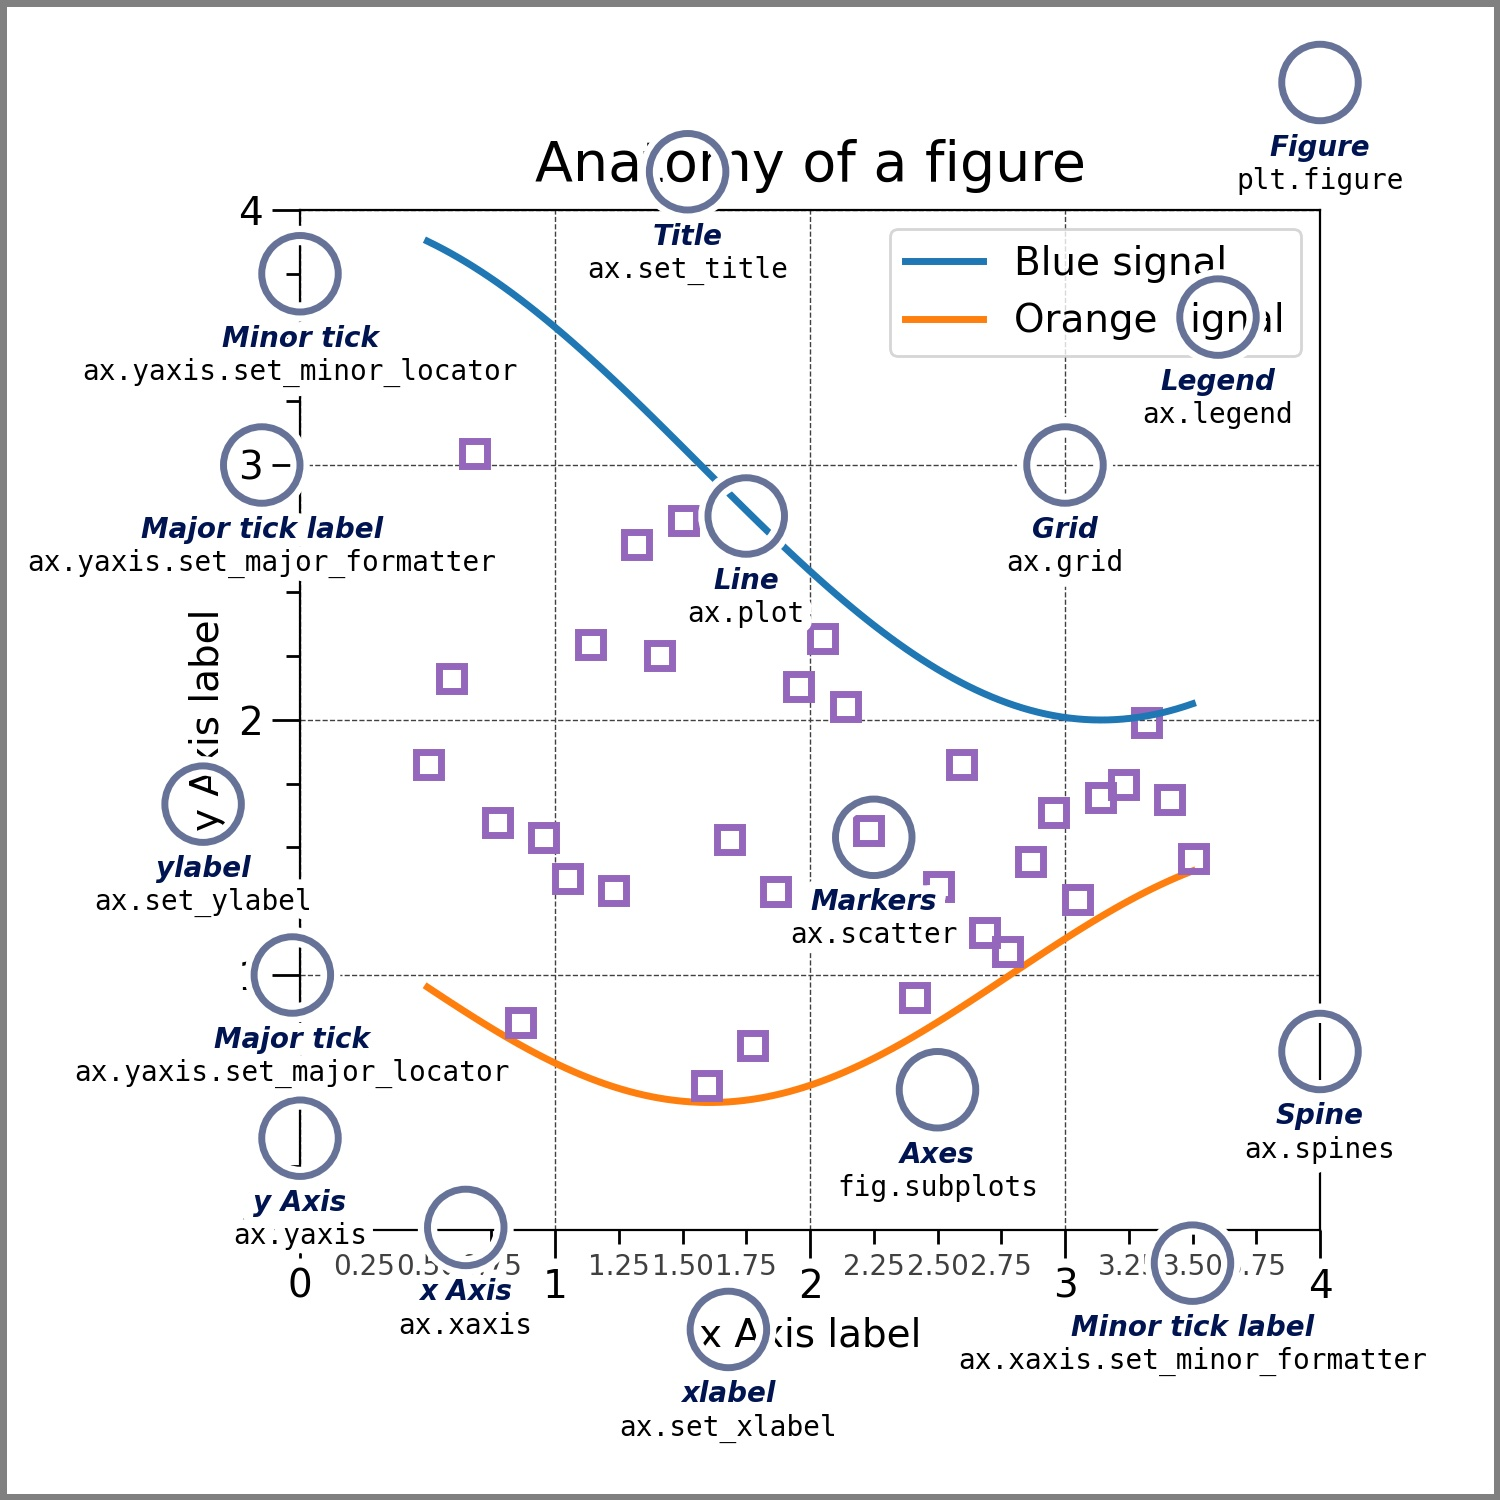

In [4]:
from IPython import display
display.Image('../images/parts_of_a_figure.jpeg', width=600)

As you can see, there is an overall `Figure` object that serves as a kind of window for the plot, and within the `Figure` there is an `Axes`. The `Axes` object has an `xaxis`, a `yaxis`, and various other elements such as `ticks`, `spines`, `grid`, etc., all of which are 100% customisable.

I'll leave it to you to investigate the basic chart elements and to ponder the elegant design patterns of matplotlib. The [user guide](https://matplotlib.org/stable/users/index.html) and [online tutorials](https://matplotlib.org/stable/tutorials/index.html) cover everything in detail. For now, let's look at some of the basic kind's of plot and how they are made with matplotlib. 

### Importing matplotlib

The plotting interface for matplotlib is called "`pyplot`" and it can be imported as follows. 

In [2]:
import matplotlib.pyplot as plt

After importing `pyplot` as above, there are two general approaches to using the library. The "implicit" `pyplot` interface involves prefixing all commands with `plt.` and letting matplotlib manage your `Figure` and `Axes` objects for you, whereas the "explicit" `Axes` interface, sometimes called the object oriented interface, involves keeping track of everything yourself and generally provides a cleaner way to make detailed and highly customised plots. I tend to use both interfaces equally, but you can stick with whichever feels most intuitive. [Read more about the difference between the two here](https://matplotlib.org/stable/users/explain/api_interfaces.html). 

Though not strictly necessary, you may wish to override the default plotting style with one of matplotlib's alternative presets. To see which styles are available, run `plt.style.available`. Below I am switching to the `bmh` plotting style, as I think it makes nicer looking plots, in general. 


In [3]:
# Use the bmh plotting style
plt.style.use('bmh')

### Line plots

Two-dimensional line plots are one of the simplest and most effective means of visualising the relationship between two variables, or tracking changes in one variable over time. Take for example the trigonometric functions [sine and cosine](https://en.wikipedia.org/wiki/Sine_and_cosine), which describe the ratio of angles in a right angle triangle. Remember, SOHCAHTOA...

These functions are well-suited for display in a 2-dimensional line plot. 

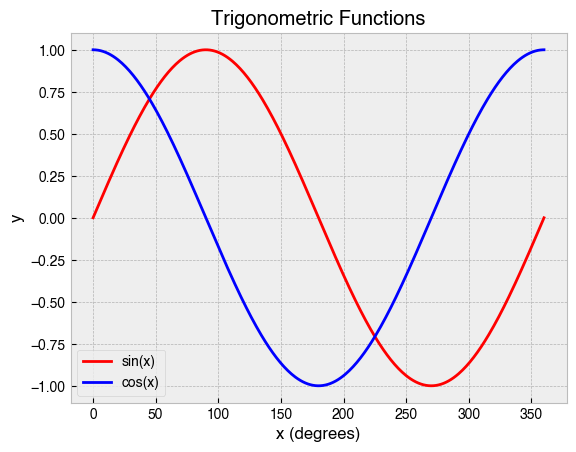

In [4]:
# Create a data point for every degree in a circle
x = np.linspace(0, 2*np.pi, 360)
degrees = np.rad2deg(x)

# Compute trignometric functions sine and cosine
sine, cosine = np.sin(x), np.cos(x)

# Plot the trigonometric functions
plt.plot(degrees, sine, color='red', label='sin(x)')
plt.plot(degrees, cosine, color='blue', label='cos(x)')

# Add labels to the x-axis and y-axis
plt.xlabel('x (degrees)')
plt.ylabel('y')

# Add a title
plt.title('Trigonometric Functions')

# Make a legend
plt.legend()

# Save the figure as a jpg
plt.savefig('trigonometric_functions.jpg')

A lot just happened there. First, we created an array in NumPy to represent the angular data of a circle before calculating the sine and cosine of these data. Then, we plotted the data, specifying both a label and color for each line. After that, we added informative labels to the x- and y-axis. Finally, we added a title and legend, and then saved the plot as a `jpg`. This exemplifies the typical workflow using the `pyplot` interface. 

### Scatter plots

Scatter plots are a good choice for showing the relationship between two sets of data. They use dots or other markers to represent the values, with the position of each dot on the horizontal and vertical axis indicating the numeric values for an individual data point.

Suppose an ice cream shop was interested in the relationship between ice cream sales and temperature, so they decided to keep track of how much ice cream was sold in two weeks and recorded the temperature at noon each day. 

|                 |   Mon |   Tue |   Wed |   Thu |   Fri |   Sat |   Sun |   Mon |   Tue |   Wed |   Thu |   Fri |   Sat |   Sun |
|:----------------|---------:|----------:|------------:|-----------:|---------:|-----------:|---------:|---------:|----------:|------------:|-----------:|---------:|-----------:|---------:|
| Ice cream sales (£) |    223   |     343   |       154   |      298   |    414   |      562   |    232   |    419   |     612   |       544   |      431   |    457   |      421   |    480   |
| Temperature (&deg;C)    |     14.1 |      16.5 |        11.3 |       15.5 |     18.4 |       22.7 |     12.4 |     19.4 |      23.9 |        22.3 |       18.5 |     22.2 |       17.3 |     19.3 |

A scatter plot will help to reveal the underlying pattern in the data. Here's how we can make it.

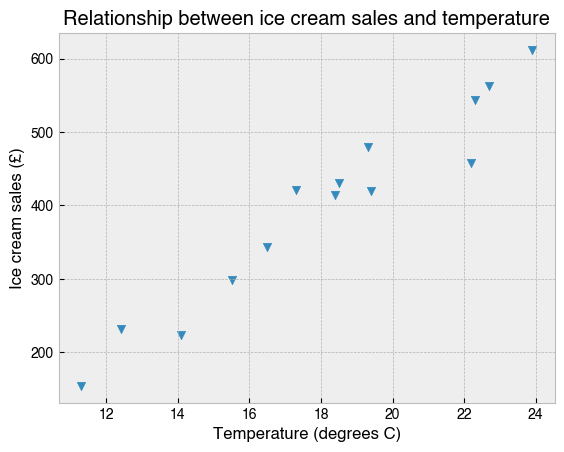

In [5]:
# Temperature in degrees C at noon
temperature = np.array(
    [14.1, 16.5, 11.3, 15.5, 18.4, 22.7, 12.4,
     19.4, 23.9, 22.3, 18.5, 22.2, 17.3, 19.3]
)
# Ice cream sales
ice_cream_sales = np.array(
    [223, 343, 154, 298, 414, 562, 232,
     419, 612, 544, 431, 457, 421, 480]
)

# Make a scatter plot
plt.scatter(temperature, ice_cream_sales, marker='v')

# Add labels to the x-axis and y-axis
plt.xlabel('Temperature (degrees C)')
plt.ylabel('Ice cream sales (£)')

# Add title
plt.title('Relationship between ice cream sales and temperature');


In this case, temperature and ice cream sales have a clear positive relationship. 

Note how this plot was created with `plt.scatter` and that I specified which marker to use for the data points (the one that looked most like an ice cream cone). [See here for other marker style options that are available](https://matplotlib.org/stable/api/markers_api.html). 

### Bar charts


Bar charts show categorical data with rectangular bars of a height or width that is proportional to the values they represent. 

They are used for all sorts of data, but it is quite common to see bar charts showing an average of some measure for each month in the year. Here's an example. Manchester is famously a very rainy city, and [on this webpage](https://www.climatestotravel.com/climate/england/manchester) I found data on average monthly rainfall for the period 1991-2020. How can we make a bar chart to visualise these data?

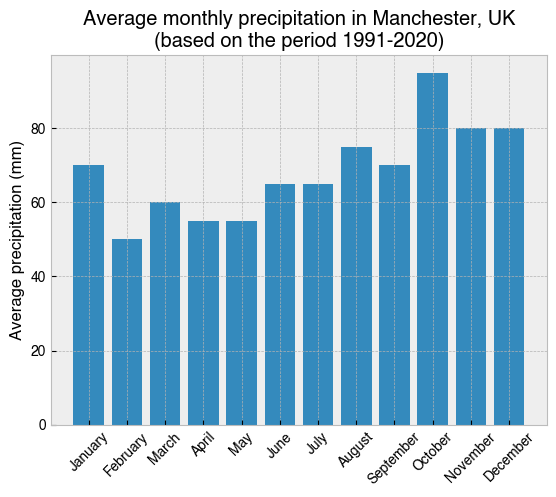

In [16]:
# Create list of months
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# List of average monthly rainfall in mm (from website)
rainfall = [70, 50, 60, 55, 55, 65, 65, 75, 70, 95, 80, 80]

# Create bar chart
plt.bar(months, rainfall)

# Rotate the month labels so they are readable
plt.xticks(rotation=45)

# Add an informative label to the y-axis
plt.ylabel('Average precipitation (mm)')

# Add a title
plt.title(
    'Average monthly precipitation in Manchester, UK\n'
    '(based on the period 1991-2020)'
);


If you don't like rain, best avoid Manchester in October. February looks enticingly dry, but it will also be cold with less daylight. April or May?

Note the use of `plt.xticks` to control the rotation angle of the text labels for each month. To see why this was necessary, try re-running the code after commenting out that line.

### Histograms

A histogram is kind of bar chart that represents data in user-specified ranges. A common use of a histogram is to illustrate how data are distributed about the mean. 

The [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution), sometimes called the bell curve, is a probability distribution that describes many naturally occurring phenomena, one example being the height of human beings. The excellent website [Our World in Data](https://ourworldindata.org/) has [a page on human height](https://ourworldindata.org/human-height) which states that the mean and standard deviation of height in centimeters for men and woman across Europe, North America, Australia, and East Asia, is:

|       | Mean  |  SD  |
| ----- | ----- | ---- |
| Men   | 178.4 | 7.59 |
| Women | 164.7 | 7.07 |

With these parameters, we can simulate height data for a large sample of men and women using `np.random.normal`, and then plot the data as overlapping histograms. 

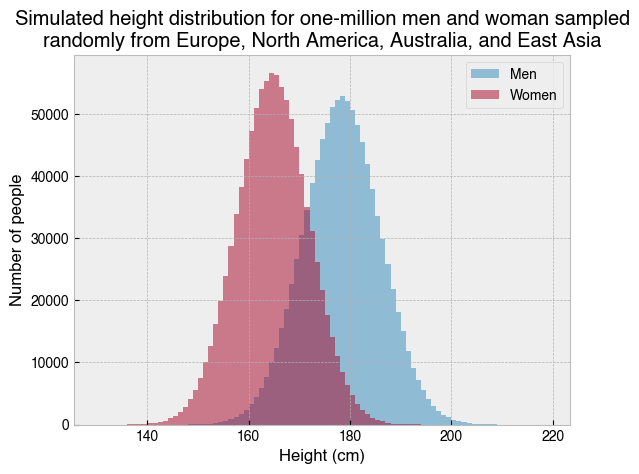

In [7]:
# One-million samples
sample_size = 1_000_000 

# Sample from the normal distribution with specified
# mean and stadard deviation for men and women
men = np.random.normal(178.4, 7.59, sample_size)
women = np.random.normal(164.7, 7.07, sample_size)

# Group the data in one-centimeter bins from 130-220 cm
bins = np.arange(130, 220, 1)

# Plot overlapping histograms (throwing away the return values)
_ = plt.hist(men, bins=bins, alpha=.5, label='Men')
_ = plt.hist(women, bins=bins, alpha=.5, label='Women')

# Label x- and y-axis
plt.xlabel('Height (cm)')
plt.ylabel('Number of people')

# Add an overall title for the figure
plt.title(
    'Simulated height distribution for one-million men and woman sampled\n'
    'randomly from Europe, North America, Australia, and East Asia'
)

# Add a legend
plt.legend();

If we actually went out and measured one-million men and women chosen at random from Europe, North America, Australia, and East Asia, the data should look very much like the above. We can summarise as follows:

  - On average, Men are taller than women
  - Women show less variation

Note the use of `alpha=.5` for the histograms, which makes the bars slightly transparent. This is necessarry because the histograms overlap and are being displayed on the same axis. Try removing `alpha=.5` from each `plt.hist` call. Does that make for a better plot?

### Pie charts

Pie charts show percentages of a whole. In general, they are not a very useful means of communicating data, because people are much better at comparing lengths and heights (i.e., as in a bar chart) than areas within a circle. 

That said, there are some good pie charts out there. Take for example [The Eatwell Guide](https://www.nhs.uk/live-well/eat-well/food-guidelines-and-food-labels/the-eatwell-guide/), which the UK Government and NHS use to advise us on how much of our overall food intake should come from each food group if we are to maintain a healthy, balanced diet. 

Let's recreate it with matplotlib. All the information we need can be attained from the following webpage:

  - https://www.gov.uk/government/publications/the-eatwell-guide

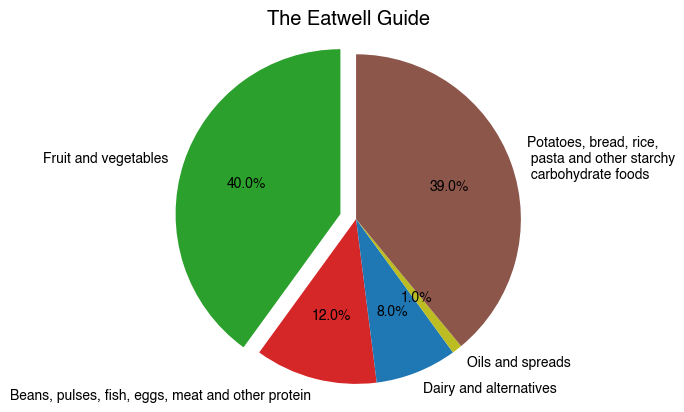

In [8]:
# Labels for each slice of the pie.
labels = [
    'Fruit and vegetables', 
    'Beans, pulses, fish, eggs, meat and other protein',
    'Dairy and alternatives',
    'Oils and spreads',
    'Potatoes, bread, rice,\n pasta and other starchy\n carbohydrate foods'
]

# Values representing slice sizes (obtained from government webpage).
sizes = [40, 12, 8, 1, 39]

# Whether to 'explode' a slice of the pie, and by how much.
explode = [0.1, 0, 0, 0, 0]

# Colours for each slice
colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:olive', 'tab:brown']

# Make the plot
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(x=sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Set title
ax.set_title('The Eatwell Guide');


Why does this work so well? Perhaps because pie itself is a type of food, or because the plot is shaped like a dinner plate and people can visualise their own meals and how much the food group proportions agree with the recommendations. Whatever the reason, its hard to deny that this plot is intuitive, or that it would carry the same message more effectively if the data were shown in an alternative format. 

Perhaps you noticed the different approach to plotting here. The `Figure` and `Axes` objects are created with `plt.subplots` and stored as variables, and then plotting is then done by calling methods directly on the `Axes` object. This is an example of the explicit object oriented interface. 

### 2.5 Box-and-whisker plots

Box-and-whisker plots, sometimes just called boxplots, display how one or more groups of numeric data are distributed around their median value. The box contains the central 50% of the data, the whiskers delimit the upper and lower quartiles, and individual points may be used to show data considered to be outliers. 

Next year I plan to go cycle-packing on the Isle of Skye and would very much like to avoid getting soaked. I found some data on the following website for average monthly rainfall across the last 10 years.

  - https://www2.sepa.org.uk/rainfall
 
A boxplot will help me decide when to book my leave, so as to minimise my chances of getting soaked. 

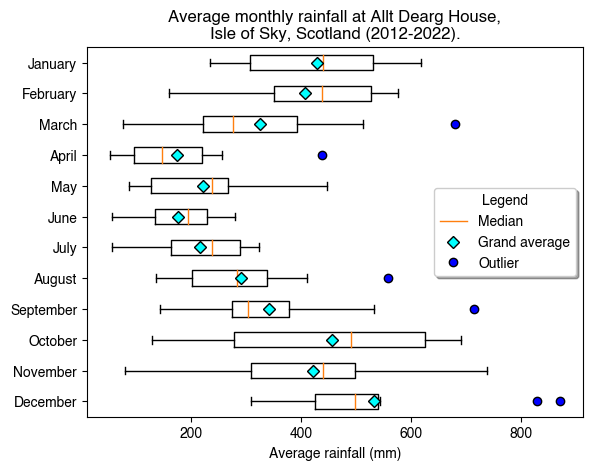

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Months of the year
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Average rainfall per month at Allt Dearg House on the Isle of Sky (2012-2022) 
# Obtained from https://www2.sepa.org.uk/rainfall
jan = [444.0, 544.0, 593.0, 436.6, 280.0, 493.4, 235.2, 618.2, 251.2, 390.2]
feb = [364.8, 191.6, 576.4, 448.6, 438.2, 360.0, 342.0, 538.4, 515.2, 160.4, 554.8]
mar = [235.0, 75.6, 411.2, 512.6, 365.8, 277.0, 163.6, 372.8, 680.4, 276.6, 207.0]
apr = [107.2, 438.8, 223.0, 145.0, 257.0, 182.6, 215.2, 63.8, 83.8, 51.6, 148.0]
may = [127.8, 282.6, 187.4, 359.6, 238.0, 91.0, 250.6, 126.2, 242.2, 86.2, 448.2]
jun = [80.0, 126.8, 56.2, 215.8, 156.0, 250.6, 194.0, 243.8, 197.2, 142.8, 279.4]
jul = [147.2, 99.8, 309.2, 323.4, 287.0, 292.4, 238.6, 245.0, 178.2, 57.0, 201.0]
aug = [195.2, 341.2, 254.2, 283.8, 286.0, 411.0, 334.8, 558.8, 135.6, 196.6, 205.2]
sep = [352.6, 272.4, 162.6, 143.2, 714.8, 303.4, 533.4, 275.8, 405.0, 303.2, 301.6]
octbr = [196.8, 437.4, 691.6, 316.8, 129.0, 605.4, 490.8, 239.8, 644.8, 600.2, 664.4]
nov = [603.8, 287.4, 373.6, 499.4, 270.6, 435.8, 492.6, 79.0, 739.2, 445.8]
dec = [488.0, 829.2, 534.2, 872.4, 507.4, 419.4, 386.8, 446.8, 543.2, 309.0]

# List of all data
data = [jan, feb, mar, apr, may, jun, jul, aug, sep, octbr, nov, dec]

# Make figure and axes object
fig, ax = plt.subplots()

# Make a boxplot
bp = ax.boxplot(
    data[::-1], 
    labels=months[::-1], 
    vert=False, 
    showmeans=True, 
    meanprops=dict(marker='D', markerfacecolor='cyan', markeredgecolor='black'),
    flierprops=dict(markerfacecolor='blue')
)

# Add label for x-axis
ax.set_xlabel('Average rainfall (mm)')

# Add title
ax.set_title(
    'Average monthly rainfall at Allt Dearg House,\n'
    'Isle of Sky, Scotland (2012-2022).'
);

# Add a legend describing symbols
ax.legend(
    handles=[bp['medians'][0], bp['means'][0], bp['fliers'][0]],
    labels=['Median', 'Grand average', 'Outlier'],
    loc='center right',
    title='Legend',
    frameon=True,
    shadow=True,
);


What is this chart telling us? Remember, the boxes show the middle 50% of the data, the whiskers show the upper and lower quartiles, and outliers are plotted as individual points. The red line in each box shows the median value for that month, and I've additionally added a cyan diamond to show the grand average across the 10-year period. For ease of interpretation, this information is present in the form of a legend. This is a more complex example, but it shows how the very fine details of a plot can be customised using matplotlib.

So, when is the best time to go to Skye? October, November and December can be written off as they had the highest average rainfall in the last 10 years, and their broad distributions suggest unpredictability. The same can be said, though to a lesser extent, of January, February and March. June does look appealing and will probably come with a better chance of sunshine than April or May, but I'm aware that the midges come out mid May and can be unbearable by June. 

All things considered, it looks like late April to early May is the best time to go cycle-packing on the Isle of Skye.

### Displaying images

Matplotlib can also display images, which are basically just numbers as far as a computer is concerned. 

A standard computer display comprises many individual picture elements (i.e., pixels), each with three components&mdash;red, green and blue. The colour of a pixel is determined by the relative mixture of the RGB intensities, which in a standard 8-bit system can range between 0-255. A colour image is therefore a *`NxNx3`* array. 

Let's use NumPy to generate a random colour image and then show it using `plt.imshow`.

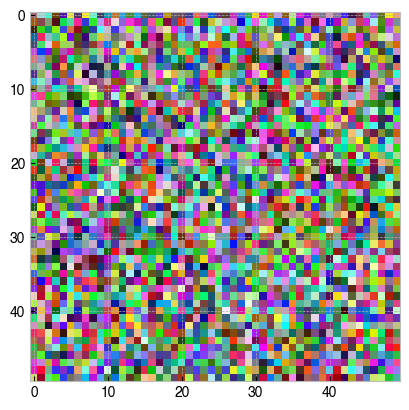

In [13]:
# Create a random 50x50 px colour image
img = np.random.randint(256, size=(50, 50, 3))

# Display the image
plt.imshow(img);

To read an actual image from file (e.g., `jpg`, `png`, etc.), we can use matplotlib's `plt.imread` function.

Shape of image : (384, 512, 3)


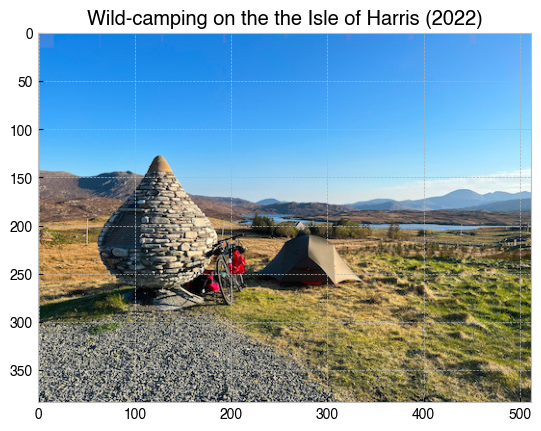

In [103]:
img = plt.imread('../images/IMG_0756.jpg')
print("Shape of image :", img.shape)
plt.imshow(img);
plt.title('Wild-camping on the the Isle of Harris (2022)');

As mentioned above, computerised images are made by mixing different quantities of red, blue and green. With some NumPy code, we can make a copy of `img` for each pixel component and null out the other colours, which will allow us to view the red, green and blue components separately. 

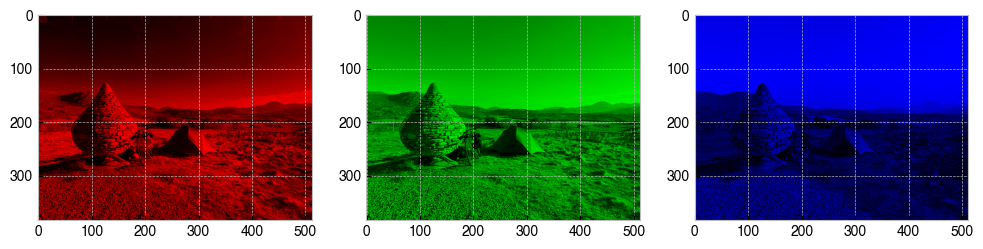

In [101]:
# Make a figure with three axes in a single row
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Copy of image for red, green and blue pixel components
red = img.copy()
green = img.copy()
blue = img.copy()

# Get rid of other components
red[:,:,[1,2]] = 0  # Null out green and blue
green[:,:,[0,2]] = 0  # Null out red and blue
blue[:,:,[0,1]] = 0  # Null out red and green

# Display each new image
axs[0].imshow(red)
axs[1].imshow(green)
axs[2].imshow(blue);